<a href="https://colab.research.google.com/github/leemichaelwaters/ml-examples/blob/main/3_Predict_auto_mpg_(sequential_nn).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Summary
- Import auto data
- EDA performed
  - Dataset has 8 features and mpg label
  - 1 feature dropped
  - Null records removed
  - One-hot encoding for categorical variables
- Data split into training (80%) and testing (20%) sets
- Standardize feature columns so that mean is zero and variance is one
- Build sequential NN model in Keras with two densely connected hidden layers (32 neurons and ReLU activation function) and an output layer that returns a single, continuous value
- Define loss function, optimizer, and metrics and compile NN model
- Use 20% of training data for validation
- Train NN model for 500 epochs witch batch size of 32
- Plot training and validation loss progress with respect to epoch number
- Optimize epoch number with respect to min validation loss
- Use trained NN model to make predictions on test data and observe error
- MAE of 1.75 meaning NN predicts MPG within +/- this value

# Import data

In [ ]:
import pandas as pd

url = 'http://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data'
colNames = ['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
            'acceleration', 'model', 'origin', 'car_name']
auto = pd.read_csv(url, names=colNames, na_values='?', sep='\s+')

# Exploratory data analysis

In [ ]:
print('Shape:')
print(auto.shape)

print('')

print('Head:')
print(auto.head())

print('')

print('Info:')
print(auto.info()) # 6 null values in horsepower

Shape:
(398, 9)

Head:
    mpg  cylinders  displacement  horsepower  weight  acceleration  model  \
0  18.0          8         307.0       130.0  3504.0          12.0     70   
1  15.0          8         350.0       165.0  3693.0          11.5     70   
2  18.0          8         318.0       150.0  3436.0          11.0     70   
3  16.0          8         304.0       150.0  3433.0          12.0     70   
4  17.0          8         302.0       140.0  3449.0          10.5     70   

   origin                   car_name  
0       1  chevrolet chevelle malibu  
1       1          buick skylark 320  
2       1         plymouth satellite  
3       1              amc rebel sst  
4       1                ford torino  

Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64

In [ ]:
# Drop car name because irrelevant
auto.drop(columns='car_name', inplace=True)

# Drop records with nulls
auto.dropna(inplace=True)

# Confirm changes
print('Shape:')
print(auto.shape)

print('')

print('Head:')
print(auto.head())

print('')

print('Info:')
print(auto.info())

Shape:
(392, 8)

Head:
    mpg  cylinders  displacement  horsepower  weight  acceleration  model  \
0  18.0          8         307.0       130.0  3504.0          12.0     70   
1  15.0          8         350.0       165.0  3693.0          11.5     70   
2  18.0          8         318.0       150.0  3436.0          11.0     70   
3  16.0          8         304.0       150.0  3433.0          12.0     70   
4  17.0          8         302.0       140.0  3449.0          10.5     70   

   origin  
0       1  
1       1  
2       1  
3       1  
4       1  

Info:
<class 'pandas.core.frame.DataFrame'>
Int64Index: 392 entries, 0 to 397
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           392 non-null    float64
 1   cylinders     392 non-null    int64  
 2   displacement  392 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        392 non-null    float64
 5   acceleration  392 non-nul

In [ ]:
# One-hot encoding
origin_oh = pd.get_dummies(auto.origin, prefix='origin')
auto = pd.concat([auto, origin_oh], axis=1)
auto.drop(columns='origin', inplace=True)

# Confirm changes
print('Shape:')
print(auto.shape)

print('')

print('Head:')
print(auto.head())

print('')

print('Info:')
print(auto.info())

Shape:
(392, 10)

Head:
    mpg  cylinders  displacement  horsepower  weight  acceleration  model  \
0  18.0          8         307.0       130.0  3504.0          12.0     70   
1  15.0          8         350.0       165.0  3693.0          11.5     70   
2  18.0          8         318.0       150.0  3436.0          11.0     70   
3  16.0          8         304.0       150.0  3433.0          12.0     70   
4  17.0          8         302.0       140.0  3449.0          10.5     70   

   origin_1  origin_2  origin_3  
0         1         0         0  
1         1         0         0  
2         1         0         0  
3         1         0         0  
4         1         0         0  

Info:
<class 'pandas.core.frame.DataFrame'>
Int64Index: 392 entries, 0 to 397
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           392 non-null    float64
 1   cylinders     392 non-null    int64  
 2   displacement  392 no

# Train and test model

In [ ]:
# Import packages
from sklearn.model_selection import train_test_split

# Define features and labels
X = auto.drop(columns='mpg')
y = auto['mpg']

# Train test split
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, random_state=42, test_size=.2)

print('Shapes:')
print(Xtrain.shape, Xtest.shape, ytrain.shape, ytest.shape)

Shapes:
(313, 9) (79, 9) (313,) (79,)


In [ ]:
# Import packages
from sklearn import preprocessing

# Standardize data
colNames = list(Xtrain.columns)

print('Describe Xtrain, Xtest:')
print(Xtrain.describe(), Xtest.describe())                                      # data pre-standardization

scaler = preprocessing.StandardScaler().fit(Xtrain)                             # compute mean and sd of Xtrain
Xtrain = scaler.transform(Xtrain)
Xtest = scaler.transform(Xtest)

Xtrain = pd.DataFrame(Xtrain, columns=colNames)                                 
Xtest = pd.DataFrame(Xtest, columns=colNames)

print('')

print('Describe Xtrain, Xtest:')
print(Xtrain.describe(), Xtest.describe())                                      # train/test sets post-standardization

Describe Xtrain, Xtest:
        cylinders  displacement  horsepower       weight  acceleration  \
count  313.000000    313.000000  313.000000   313.000000    313.000000   
mean     5.482428    195.517572  104.594249  2986.124601     15.544089   
std      1.700446    103.766567   38.283669   841.133957      2.817864   
min      3.000000     70.000000   46.000000  1613.000000      8.000000   
25%      4.000000    105.000000   76.000000  2234.000000     13.500000   
50%      4.000000    151.000000   95.000000  2855.000000     15.500000   
75%      8.000000    302.000000  129.000000  3645.000000     17.300000   
max      8.000000    455.000000  230.000000  5140.000000     24.800000   

            model    origin_1    origin_2    origin_3  
count  313.000000  313.000000  313.000000  313.000000  
mean    76.207668    0.645367    0.153355    0.201278  
std      3.630136    0.479168    0.360906    0.401597  
min     70.000000    0.000000    0.000000    0.000000  
25%     73.000000    0.000000

In [ ]:
# Convert data from pd to np

print('Types:')
print(type(Xtrain), type(Xtest), type(ytrain), type(ytest))

Xtrain = Xtrain.to_numpy()
Xtest = Xtest.to_numpy()
ytrain = ytrain.to_numpy()
ytest = ytest.to_numpy()

print('')

print('Types:')
print(type(Xtrain), type(Xtest), type(ytrain), type(ytest))

Types:
<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.frame.DataFrame'> <class 'pandas.core.series.Series'> <class 'pandas.core.series.Series'>

Types:
<class 'numpy.ndarray'> <class 'numpy.ndarray'> <class 'numpy.ndarray'> <class 'numpy.ndarray'>


In [ ]:
# Import packages
from tensorflow.keras import models
from tensorflow.keras import layers

# Build neural network
model = models.Sequential()
model.add(layers.Dense(32, activation='relu', input_shape=(9,)))
model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dense(1))

print(model.summary())

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 32)                320       
                                                                 
 dense_4 (Dense)             (None, 32)                1056      
                                                                 
 dense_5 (Dense)             (None, 1)                 33        
                                                                 
Total params: 1,409
Trainable params: 1,409
Non-trainable params: 0
_________________________________________________________________
None


In [ ]:
# Compile model
model.compile(optimizer='rmsprop',
              loss='mse',
              metrics=['mae'])

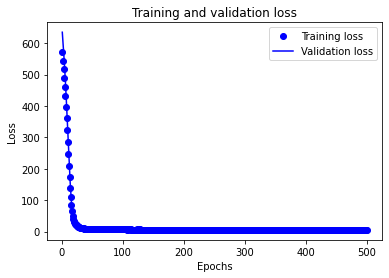

In [ ]:
# Import packages 
import matplotlib.pyplot as plt

# Fit model
history = model.fit(Xtrain, ytrain,
                    epochs=500,
                    batch_size=32,
                    validation_split=0.2,
                    verbose=0)

# Define training and validation losses
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(loss) + 1)

# Plot loss cuves
plt.plot(epochs, loss, 'bo', label='Training loss')                             # "bo" is for "blue dot"
plt.plot(epochs, val_loss, 'b', label='Validation loss')                        # b is for "solid blue line"
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

In [ ]:
# Import packages
import numpy as np

# Test model 
model.fit(Xtrain, ytrain, epochs=np.argmin(val_loss), batch_size=32, verbose = 0)
results = model.evaluate(Xtest, ytest)

results

3/3 [==============================] - 0s 5ms/step - loss: 6.0156 - mae: 1.7359


[6.015561580657959, 1.735878825187683]